In [1]:
from PIL import Image
import numpy as np
import numpy.linalg as ln
import matplotlib.pyplot as plt
%matplotlib inline

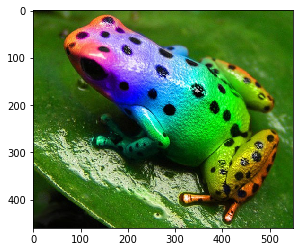

In [2]:
frog = np.array(Image.open("frog.png").convert("RGB")) / 255    # The last division to force numbers to be in [0,1]
plt.imshow(frog)

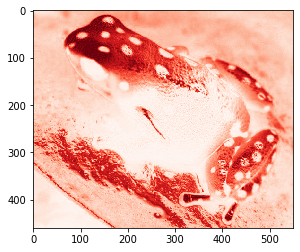

In [3]:
plt.imshow(frog[:, :, 0], cmap="Reds")

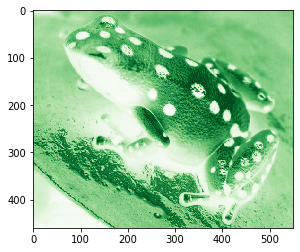

In [4]:
plt.imshow(frog[:, :, 1], cmap="Greens")

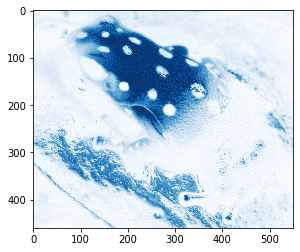

In [5]:
plt.imshow(frog[:, :, 2], cmap="Blues")

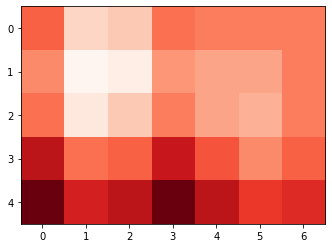

In [6]:
plt.imshow(frog[:5, :7, 0], cmap='Reds')

In [7]:
m, n = 5, 7
U, S, V = ln.svd(frog[:m, :n, 0])    # The full SVD
U

array([[-0.39788398, -0.36543522,  0.62422277, -0.13887922, -0.54699536],
       [-0.34678067, -0.6221523 , -0.04473671, -0.2066373 ,  0.66930511],
       [-0.37003258, -0.30173853, -0.58008747,  0.56828738, -0.33552605],
       [-0.48663527,  0.33444901, -0.4168619 , -0.66840546, -0.17547156],
       [-0.58965541,  0.52581492,  0.3131601 ,  0.41024039,  0.33084549]])

In [8]:
S    # The singular values

array([0.56718494, 0.04507853, 0.01186962, 0.00535811, 0.00239964])

In [9]:
V.T    # ln.svd returns the transpose of V as described above

array([[-0.44144148,  0.00805258, -0.34802796, -0.43122079, -0.6154589 ,
        -0.27495622,  0.20880411],
       [-0.31166565,  0.5449395 ,  0.23775207, -0.35146394,  0.48441701,
         0.01417878,  0.43702589],
       [-0.33600815,  0.50085745, -0.07655113,  0.75473694, -0.16608873,
        -0.18031113, -0.02558979],
       [-0.43036972,  0.0911213 , -0.21010348, -0.10506322,  0.01974858,
         0.74834709, -0.43690237],
       [-0.38033786, -0.11840556,  0.34471072, -0.15521284,  0.19526341,
        -0.50577589, -0.63597931],
       [-0.34801313, -0.3915078 ,  0.67341108,  0.18465919, -0.27207837,
         0.25389481,  0.3154961 ],
       [-0.37961076, -0.52584844, -0.44725717,  0.22730057,  0.49640768,
        -0.10672745,  0.26431653]])

In [10]:
r = 2
nU, nS, nV = U[:m, :r], S[:r], V[:r, :n]
nU

array([[-0.39788398, -0.36543522],
       [-0.34678067, -0.6221523 ],
       [-0.37003258, -0.30173853],
       [-0.48663527,  0.33444901],
       [-0.58965541,  0.52581492]])

In [11]:
nS

array([0.56718494, 0.04507853])

In [12]:
nV.T

array([[-0.44144148,  0.00805258],
       [-0.31166565,  0.5449395 ],
       [-0.33600815,  0.50085745],
       [-0.43036972,  0.0911213 ],
       [-0.38033786, -0.11840556],
       [-0.34801313, -0.3915078 ],
       [-0.37961076, -0.52584844]])

In [13]:
nX = nU.dot(np.diag(nS)).dot(nV)
nX

array([[0.09948913, 0.06135783, 0.06757747, 0.0956221 , 0.08778282,
        0.08498687, 0.09433066],
       [0.08660074, 0.04601792, 0.05204213, 0.08209333, 0.07812896,
        0.07943039, 0.08941297],
       [0.09253884, 0.05799919, 0.06370772, 0.08908524, 0.08143468,
        0.07836518, 0.08682409],
       [0.12196464, 0.09423929, 0.10029351, 0.12016108, 0.10319275,
        0.09015331, 0.09684926],
       [0.14782818, 0.11715129, 0.12424761, 0.14609427, 0.12439503,
        0.1071109 , 0.11449425]])

In [14]:
nX.shape

(5, 7)

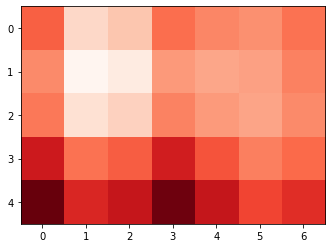

In [15]:
plt.imshow(nX, cmap="Reds")

In [16]:
def approx_compact_svd(a, r):
    """Finds U S V for an approximation of matrix a with rank r"""
    m, n = a.shape
    U, S, V = ln.svd(a)
    return (U[:m, :r], S[:r], V.T[:n, :r])